# Internet of Vehicles (IoV) Network Packet Analysis (NPA) for Intrusion Detection Systems (IDS) - Exploratory Data Analysis

This notebook contains the data analysis portion of the this project. Summaries of the datasets and visualizations of their count and type were examined.

Note that the summary is considered sufficient due to the subject of the data; network packets do not contain much information that requires exploration

This section requires the installation of PySpark, FindSpark, matplotlib, pandas, sklearn, and seaborn

### Importing Libraries and Initiating PySpark

In [15]:
import numpy as np
from matplotlib import pyplot
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import findspark
findspark.init()

In [4]:
import pyspark

try:
    from pyspark import SparkContext, SparkConf
    from pyspark.sql import SparkSession
except ImportError as e:
    printmd('<<<<<!!!!! Please restart your kernel after installing Apache Spark !!!!!>>>>>')

In [ ]:
sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))

spark = SparkSession \
    .builder \
    .getOrCreate()

### Data Loading

In [6]:
attack_df = spark.read.csv('./decimal_IOT_Dataset/decimal_attack.csv', header = True)
attack_df.createOrReplaceTempView('attack')
attack_df.show()

+---+------+------+------+------+------+------+------+------+------+--------+--------------+
| ID|DATA_0|DATA_1|DATA_2|DATA_3|DATA_4|DATA_5|DATA_6|DATA_7| label|category|specific_class|
+---+------+------+------+------+------+------+------+------+------+--------+--------------+
|291|     0|     0|     0|     0|     0|     0|     0|     0|ATTACK|     DoS|           DoS|
|291|    14|    11|     4|     4|     3|     3|     8|    12|ATTACK|     DoS|           DoS|
|291|    14|    11|     4|     4|     3|     3|     8|    12|ATTACK|     DoS|           DoS|
|291|    14|    11|     4|     4|     3|     3|     8|    12|ATTACK|     DoS|           DoS|
|291|    14|    11|     4|     4|     3|     3|     8|    12|ATTACK|     DoS|           DoS|
|291|    14|    11|     4|     4|     3|     3|     8|    12|ATTACK|     DoS|           DoS|
|291|    14|    11|     4|     4|     3|     3|     8|    12|ATTACK|     DoS|           DoS|
|291|    14|    11|     4|     4|     3|     3|     8|    12|ATTACK|  

In [7]:
benign_df = spark.read.csv('./decimal_IOT_Dataset/decimal_benign.csv', header = True)
benign_df.createOrReplaceTempView('benign')
benign_df.show()

+----+------+------+------+------+------+------+------+------+------+--------+--------------+
|  ID|DATA_0|DATA_1|DATA_2|DATA_3|DATA_4|DATA_5|DATA_6|DATA_7| label|category|specific_class|
+----+------+------+------+------+------+------+------+------+------+--------+--------------+
|  65|    96|     0|     0|     0|     0|     0|     0|     0|BENIGN|  BENIGN|        BENIGN|
|1068|   132|    13|   160|     0|     0|     0|     0|     0|BENIGN|  BENIGN|        BENIGN|
| 535|   127|   255|   127|   255|   127|   255|   127|   255|BENIGN|  BENIGN|        BENIGN|
| 131|    15|   224|     0|     0|     0|     0|     0|     0|BENIGN|  BENIGN|        BENIGN|
| 936|     1|     0|    39|    16|     0|     0|     0|     0|BENIGN|  BENIGN|        BENIGN|
| 359|     0|   128|     0|     0|     0|     1|   227|     0|BENIGN|  BENIGN|        BENIGN|
| 369|    16|   108|     0|     0|     0|     0|     0|     0|BENIGN|  BENIGN|        BENIGN|
| 516|   192|     0|   125|     0|     0|     0|     0|     

### Data Summaries

In [14]:
atk_summary = attack_df.describe().toPandas()
atk_summary

,summary,ID,DATA_0,DATA_1,DATA_2,DATA_3,DATA_4,DATA_5,DATA_6,DATA_7,label,category,specific_class
0,count,184482,184482,184482,184482,184482,184482,184482,184482,184482,184482,184482,184482
1,mean,356.1685584501469,32.4134116065524,14.466029206101409,26.558357996986157,33.16852050606563,19.207293936535812,10.718140523194675,31.836780824145446,21.50664021422144,None,None,None
2,stddev,121.45209719885088,58.8439302228565,15.714448763513849,58.63381927761698,51.34210315149994,39.29699737464723,15.28756094090642,53.7776568286089,32.43017589854959,None,None,None
3,min,128,0,0,0,0,0,0,0,0,ATTACK,DoS,DoS
4,max,513,9,9,9,9,9,9,8,9,ATTACK,SPOOFING,STEERING_WHEEL


In [13]:
benign_summary = benign_df.describe().toPandas()
benign_summary

,summary,ID,DATA_0,DATA_1,DATA_2,DATA_3,DATA_4,DATA_5,DATA_6,DATA_7,label,category,specific_class
0,count,1223737,1223737,1223737,1223737,1223737,1223737,1223737,1223737,1223737,1223737,1223737,1223737
1,mean,564.5001736484228,76.91669778718793,78.35954130666966,59.30063404146479,61.1146921274751,49.216484424349346,60.38978636749563,77.76605185591349,66.1191800198899,None,None,None
2,stddev,334.306953581894,91.26327694797583,99.7072474063374,73.71815383827628,94.27599572993428,66.56173208148407,99.41049601757481,105.76757302938843,105.26301250373224,None,None,None
3,min,1002,0,0,0,0,0,0,0,0,BENIGN,BENIGN,BENIGN
4,max,995,96,96,96,99,96,9,98,96,BENIGN,BENIGN,BENIGN


### Data Visualization

In [17]:
attack_df = attack_df.toPandas()
benign_df = benign_df.toPandas()

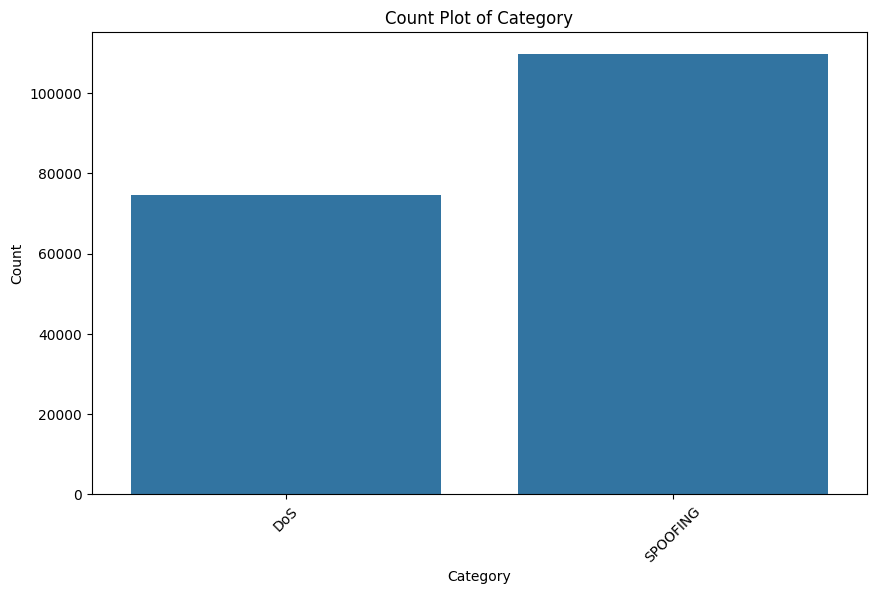

In [36]:
plt.figure(figsize=(10, 6))
sns.countplot(data=attack_df, x='category')
plt.title("Count Plot of Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


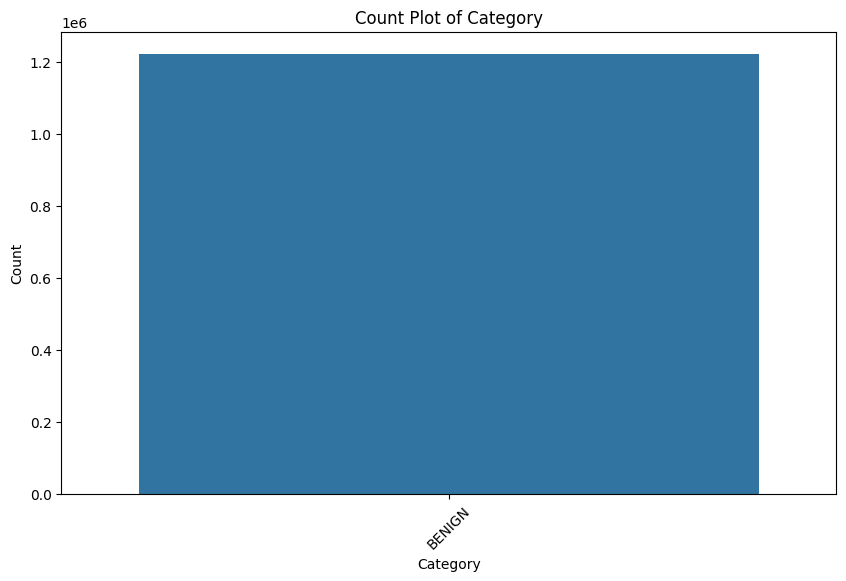

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(data=benign_df, x='category')
plt.title("Count Plot of Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


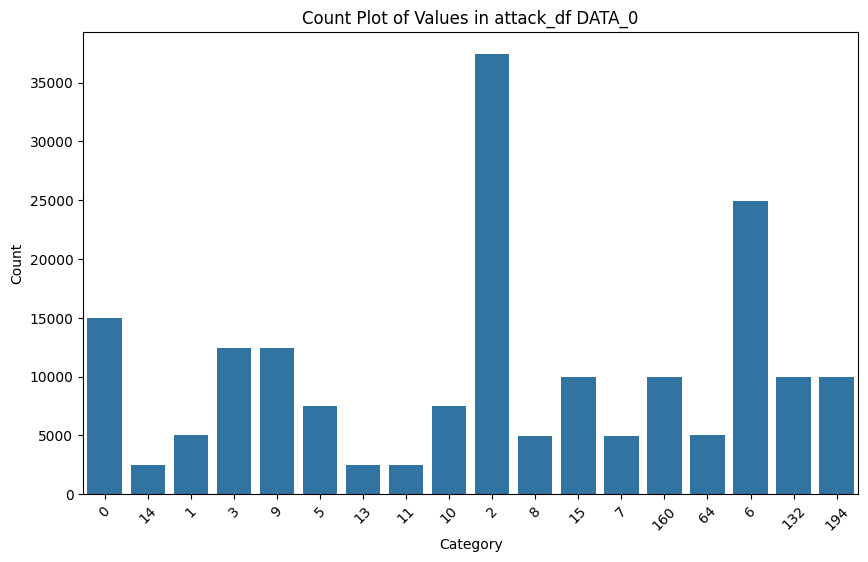

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(data=attack_df, x='DATA_0')
plt.title("Count Plot of Values in attack_df DATA_0")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


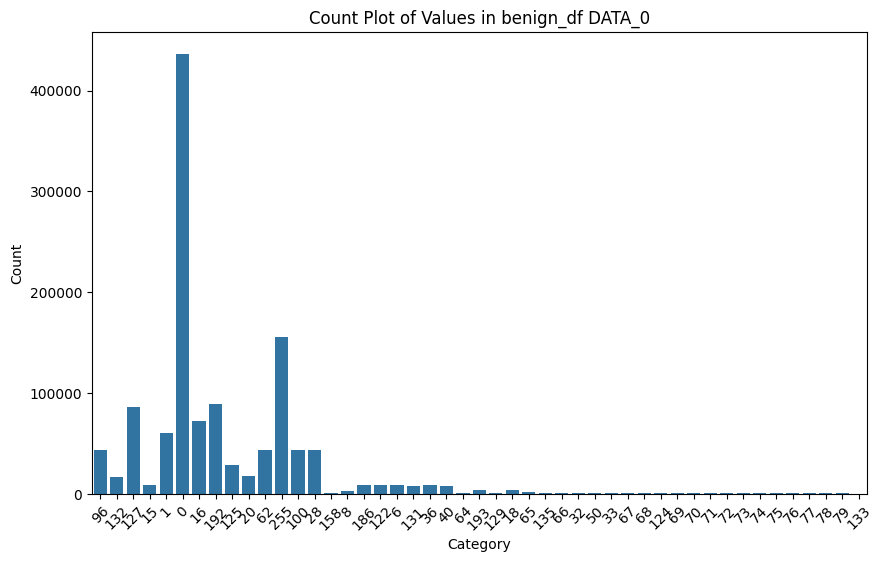

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(data=benign_df, x='DATA_0')
plt.title("Count Plot of Values in benign_df DATA_0")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


In [37]:
spark.stop()